In [1]:
def randomize(A, rowcol=0):
    """
    행렬 A를 행 혹은 열을 랜덤하게 섞기
    rowcol: 0 혹은 없으면 행을 랜덤하게 섞기 (default)
            1 이면, 열을 랜덤하게 섞기
    """
    np.random.seed(int(sum([int(x) for x in str(time.time()) if x.isdigit()])))
    
    if rowcol == 0:
        m, n = A.shape
        p = np.random.rand(m, 1)
        p1, I = np.sort(p, axis=0), np.argsort(p, axis=0)
        B = A[I, :]
        return B.reshape(A.shape)
    elif rowcol == 1:
        Ap = A.T
        m, n = Ap.shape
        p = np.random.rand(m, 1)
        p1, I = np.sort(p, axis=0), np.argsort(p, axis=0)
        B = Ap[I, :]
        return B.reshape(Ap.shape).T


In [2]:
def datagen(Nvec, mean_var):
    m, c = mean_var.shape
    if m != 3 or c != len(Nvec):
        print("dimension not match, break")
        return None
    X = np.empty((0, 2))
    for i in range(c):
        np.random.seed(int(sum([int(x) for x in str(time.time()) if x.isdigit()])))
        tmp = np.sqrt(mean_var[2, i]) * np.random.randn(Nvec[i], 2)  # scaled by variance
        mean = mean_var[0:2, i]  # mean is a 2 by 1 vector
        X = np.vstack((X, tmp + np.ones((Nvec[i], 2)) * mean))
    return X

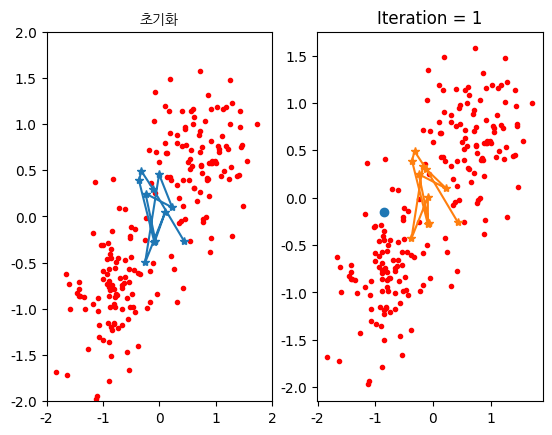

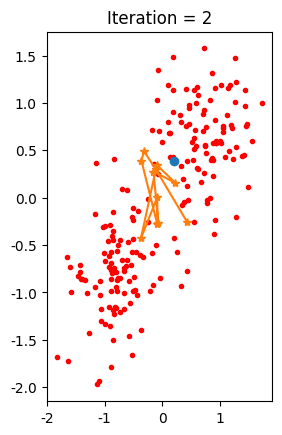

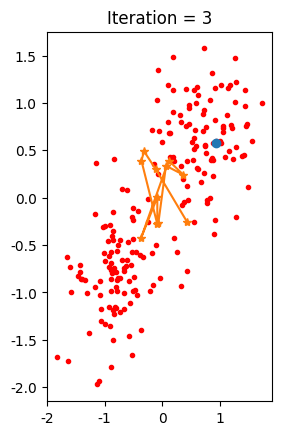

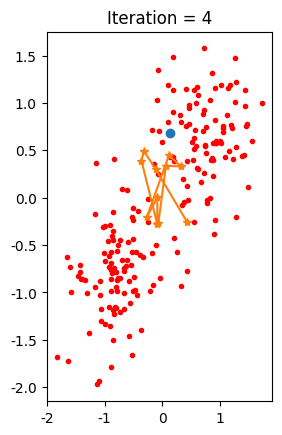

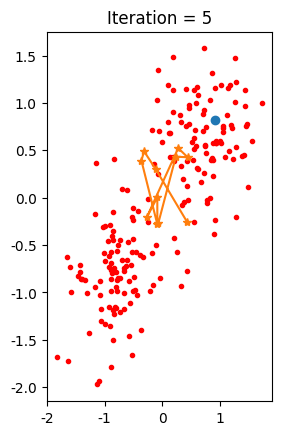

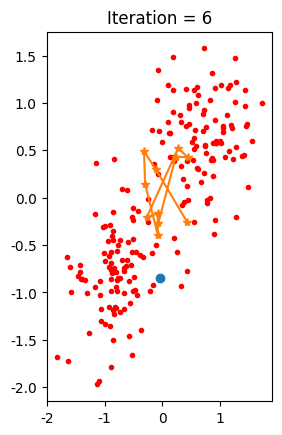

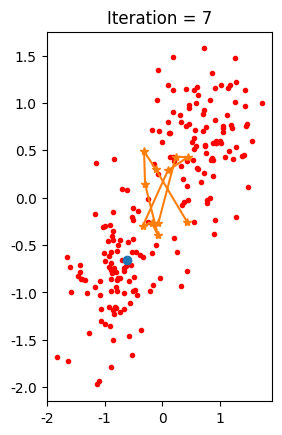

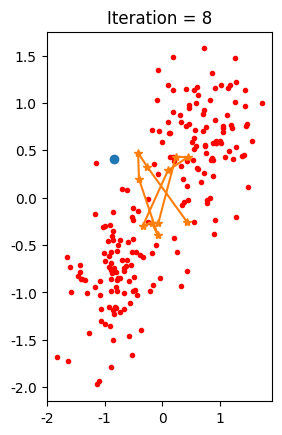

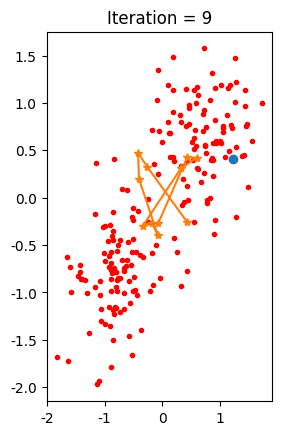

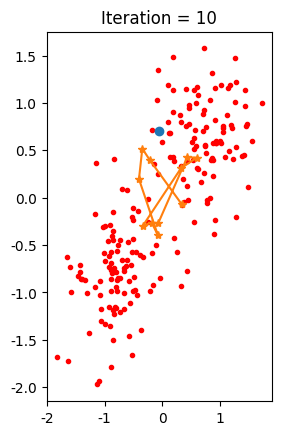

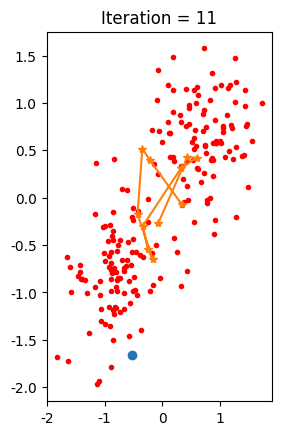

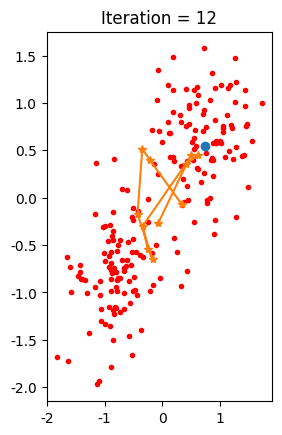

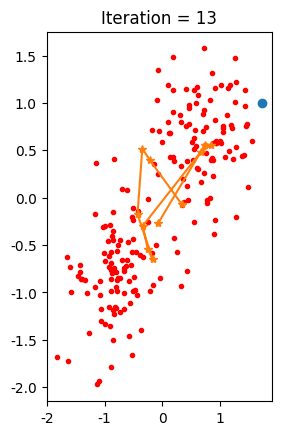

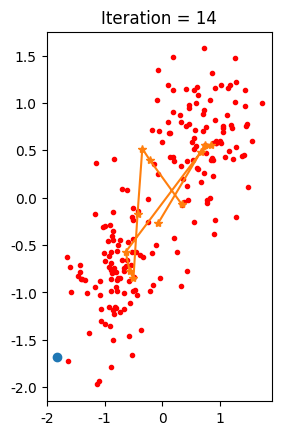

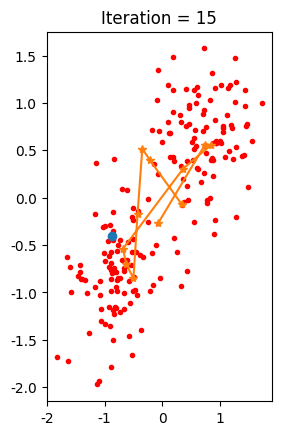

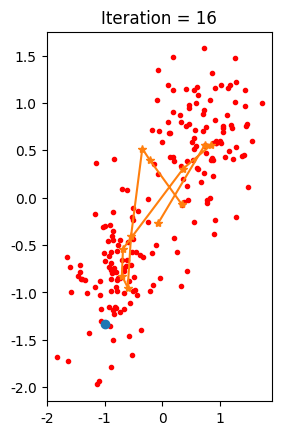

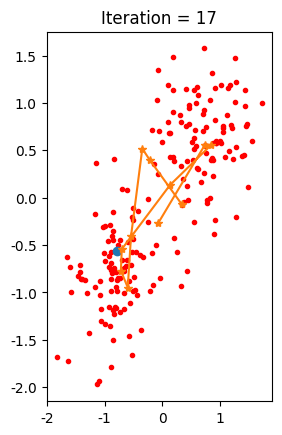

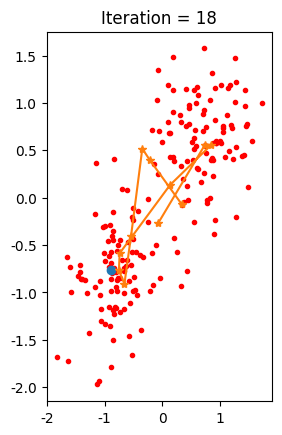

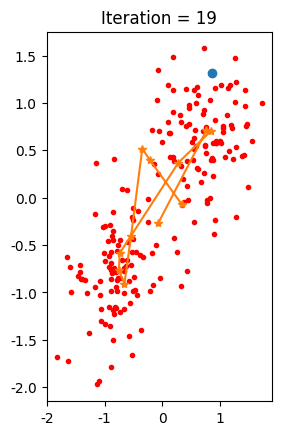

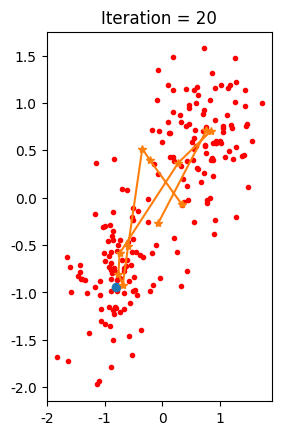

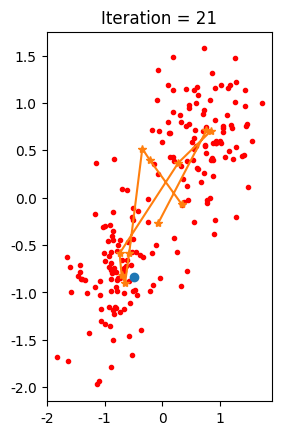

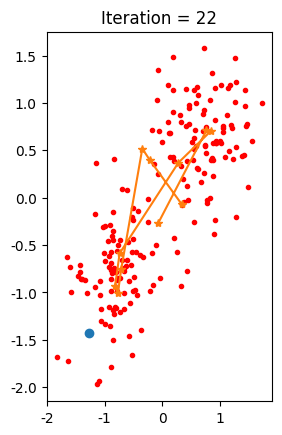

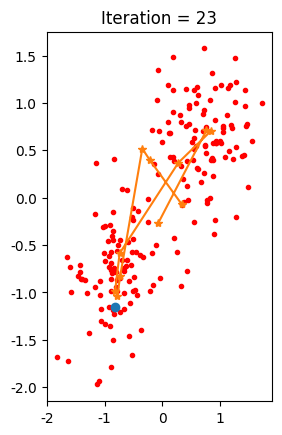

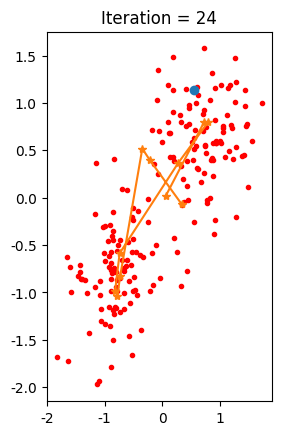

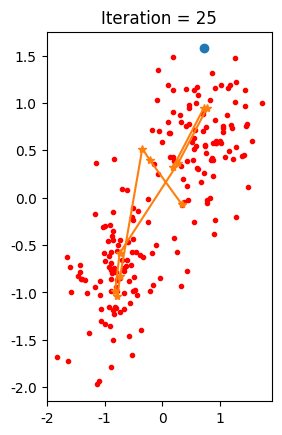

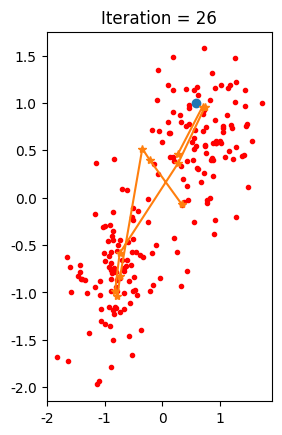

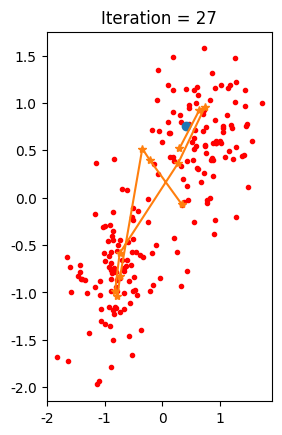

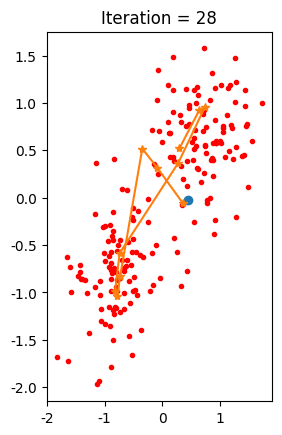

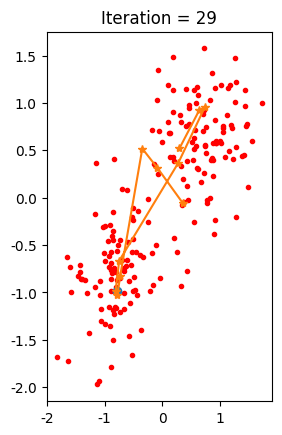

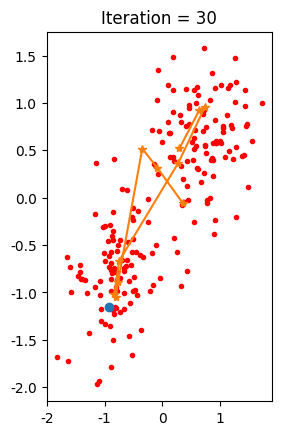

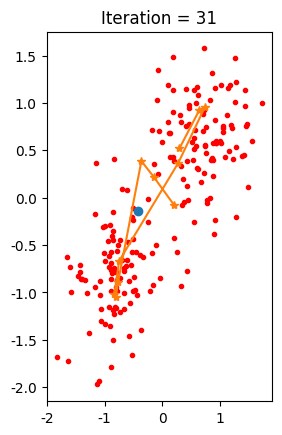

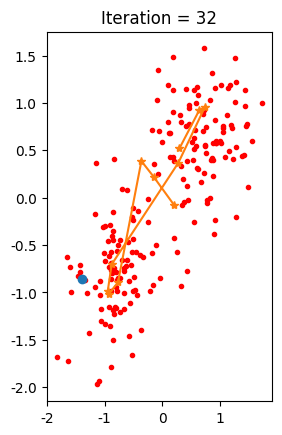

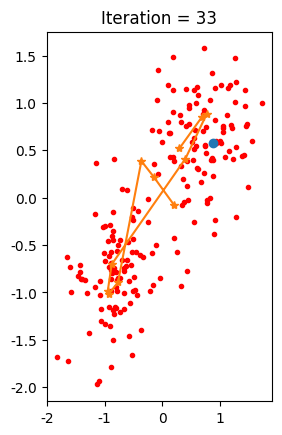

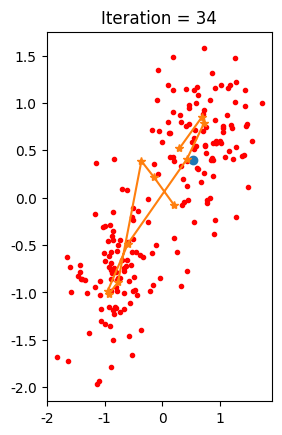

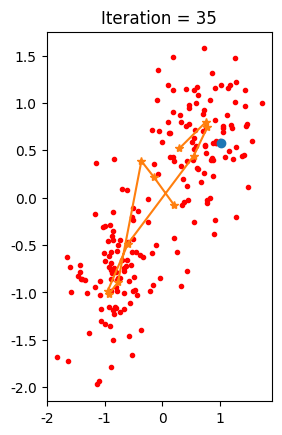

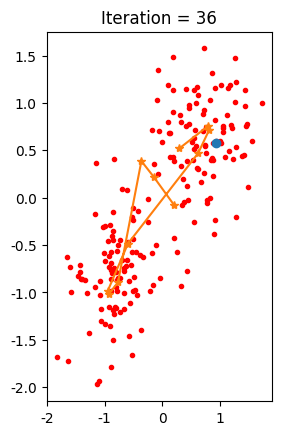

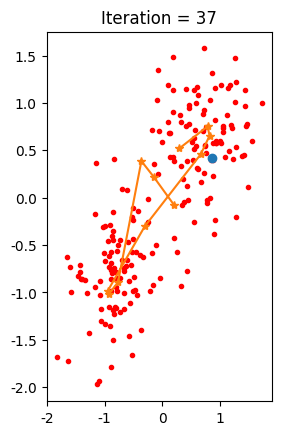

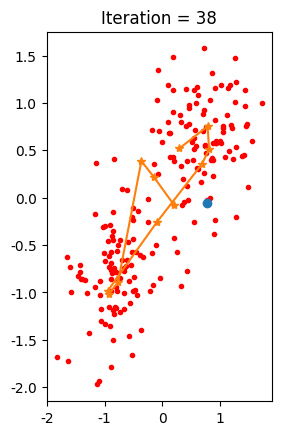

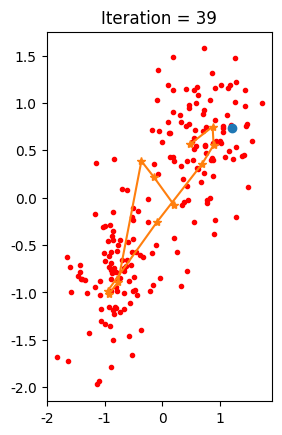

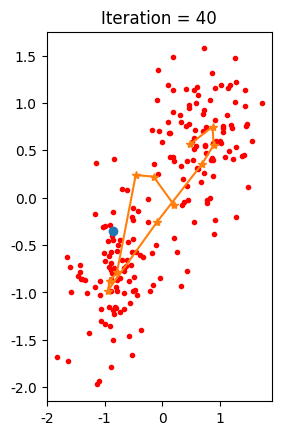

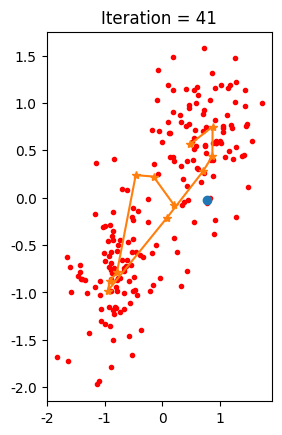

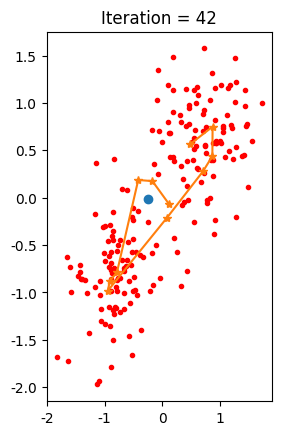

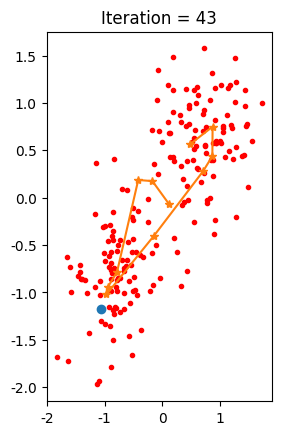

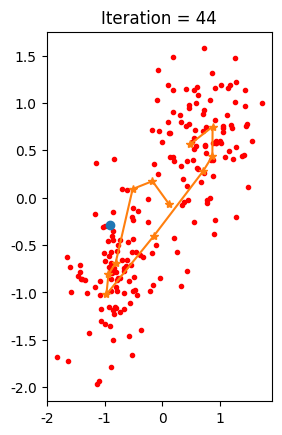

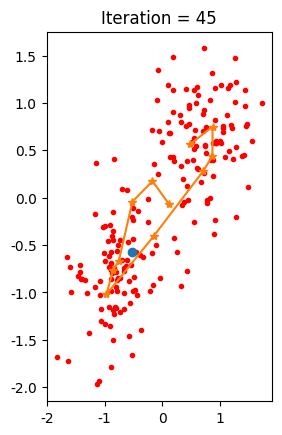

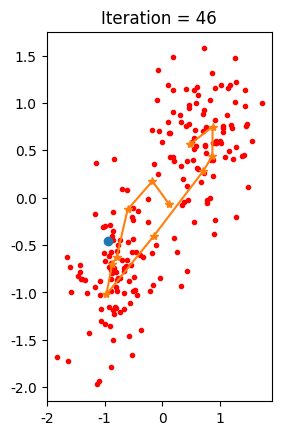

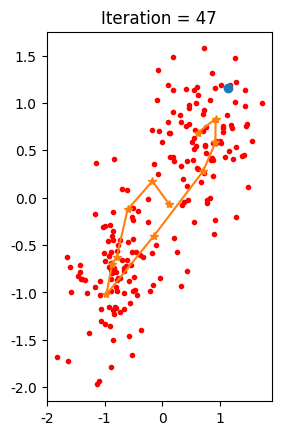

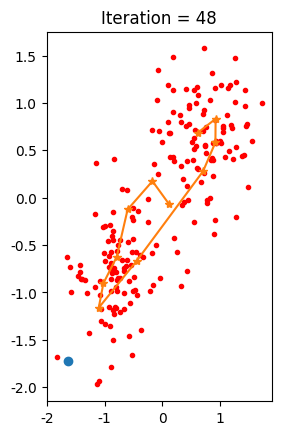

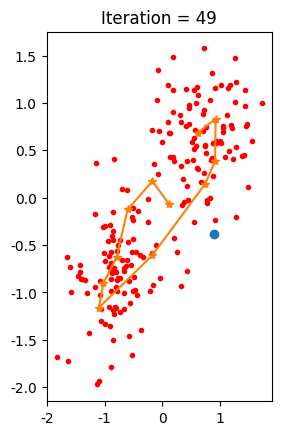

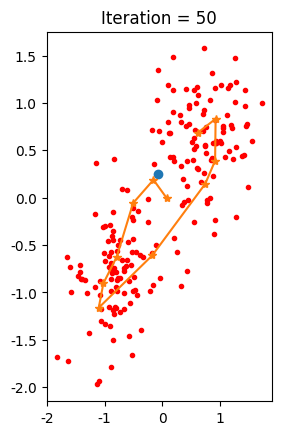

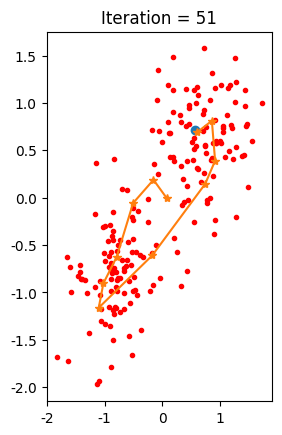

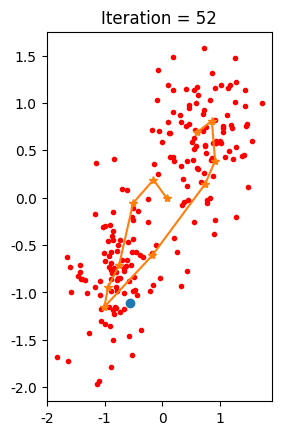

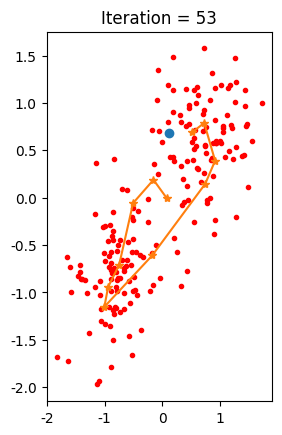

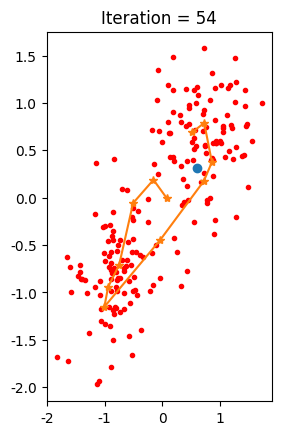

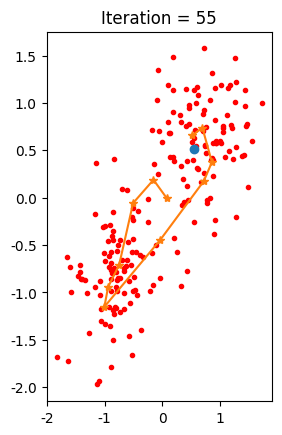

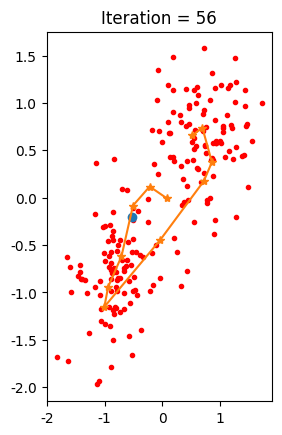

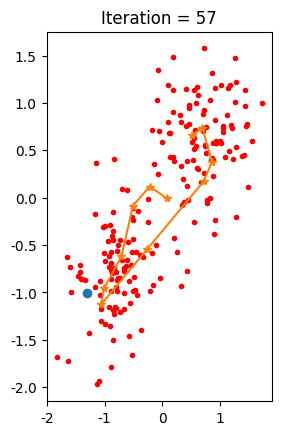

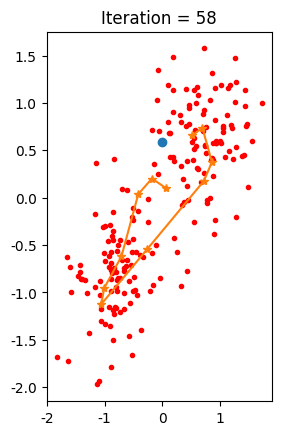

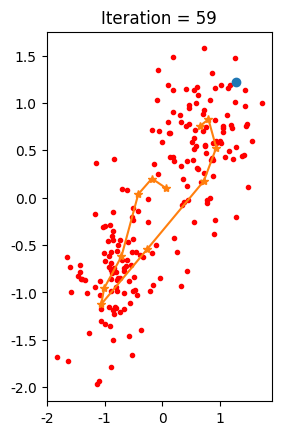

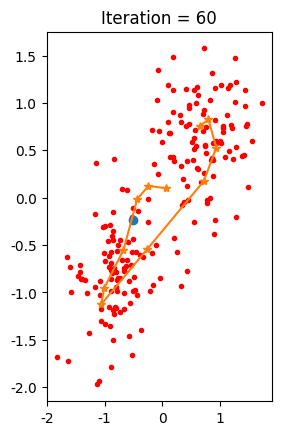

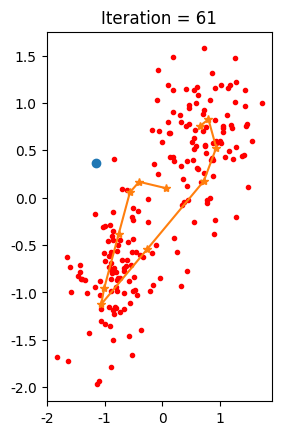

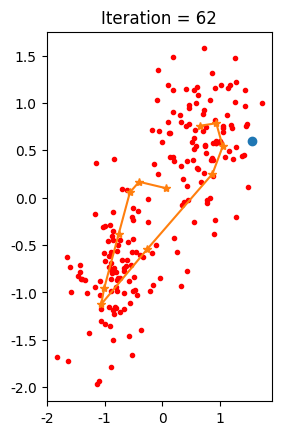

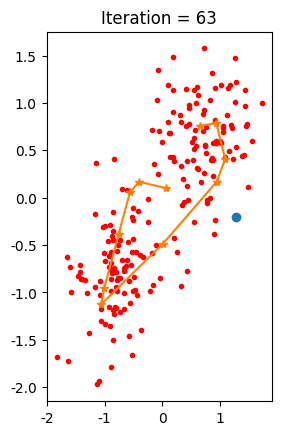

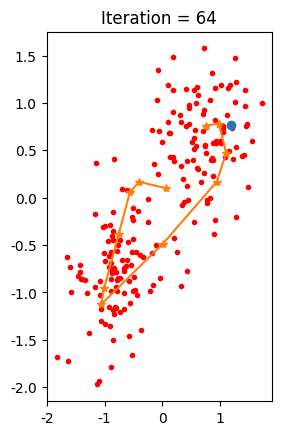

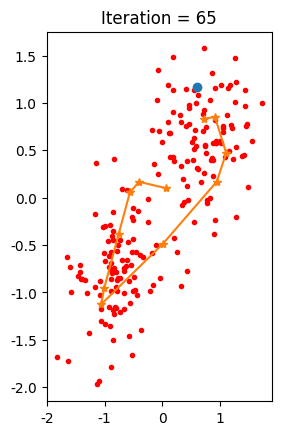

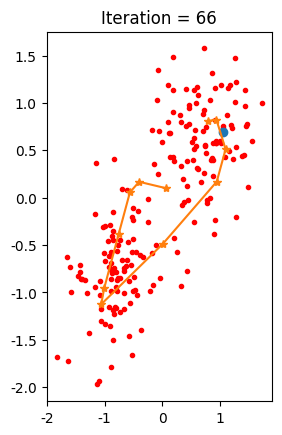

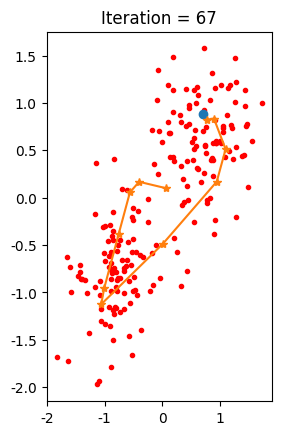

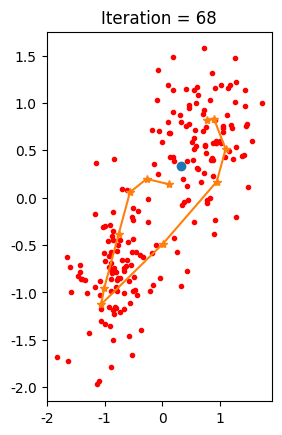

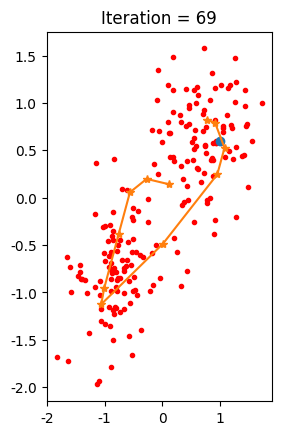

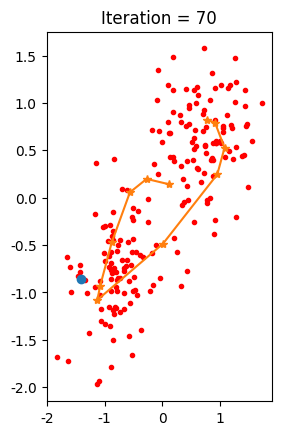

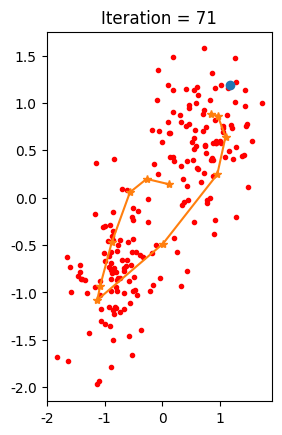

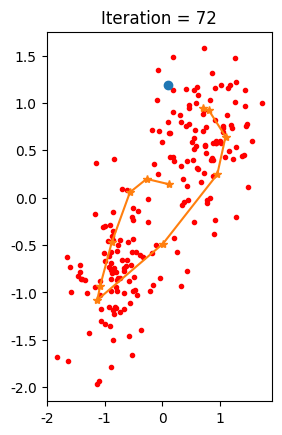

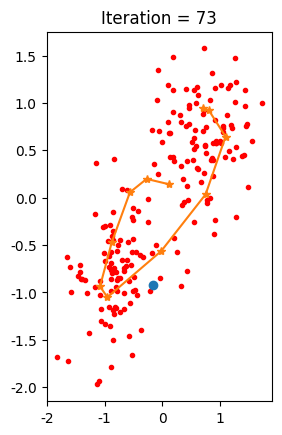

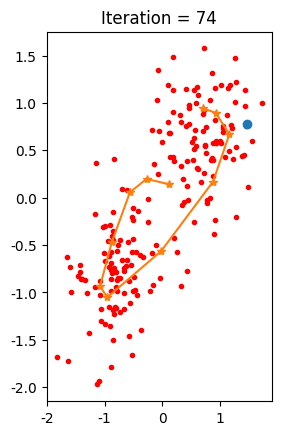

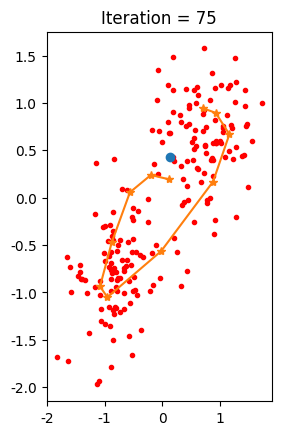

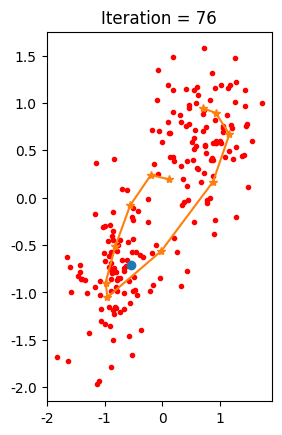

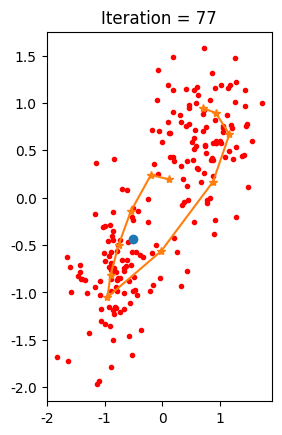

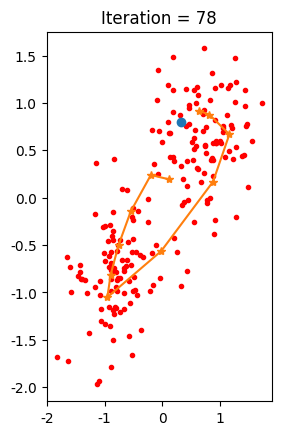

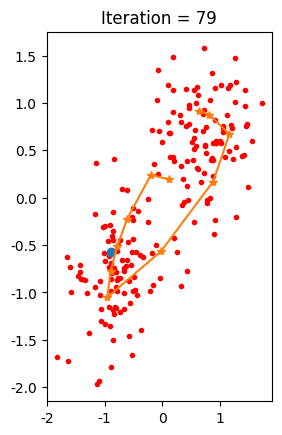

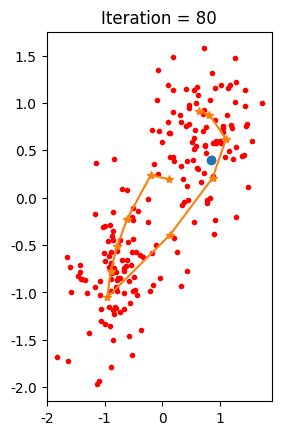

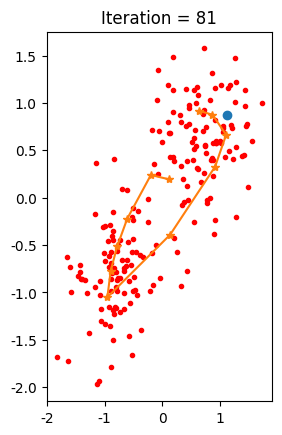

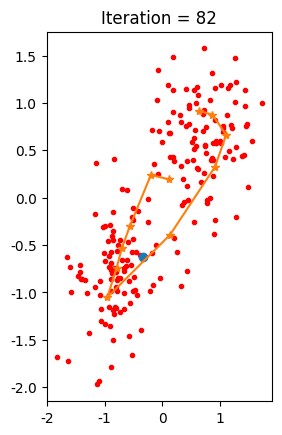

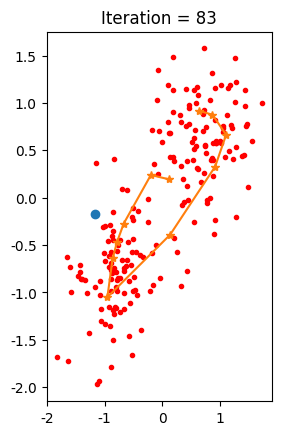

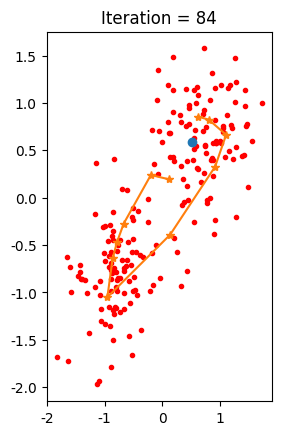

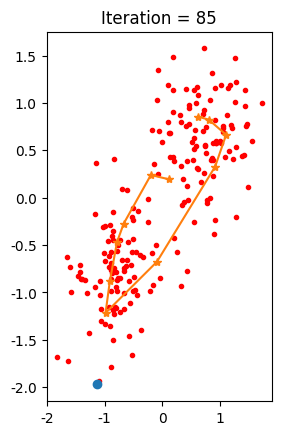

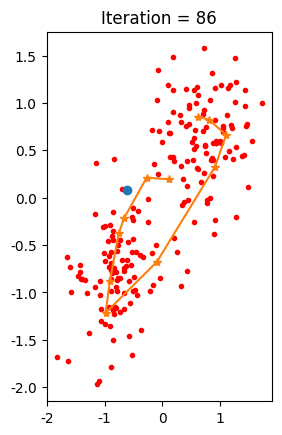

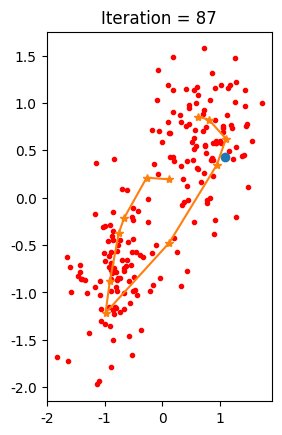

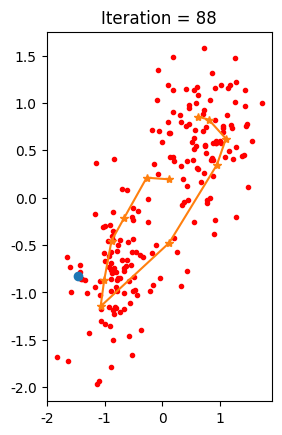

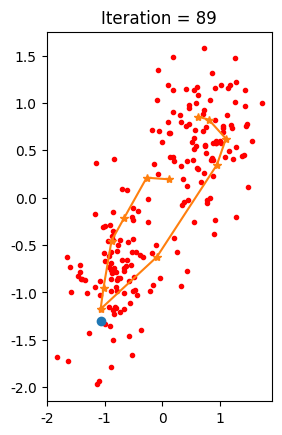

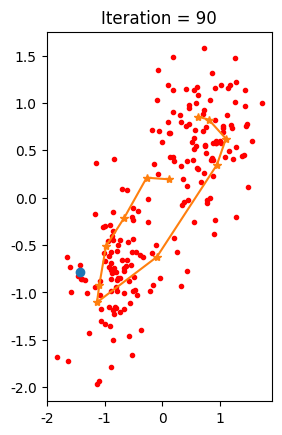

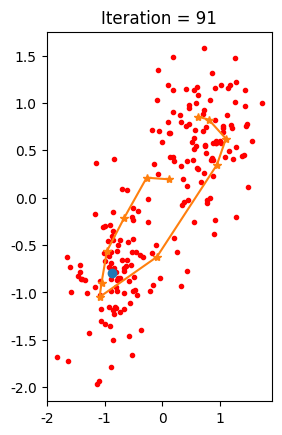

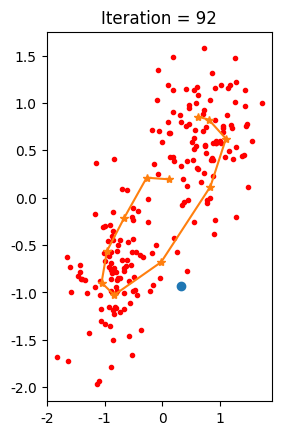

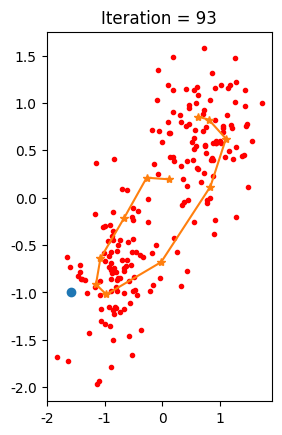

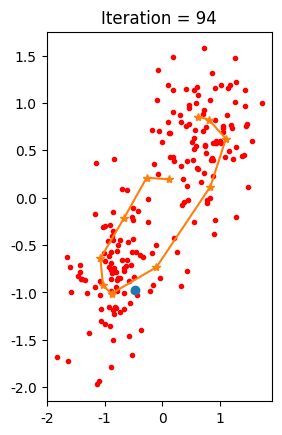

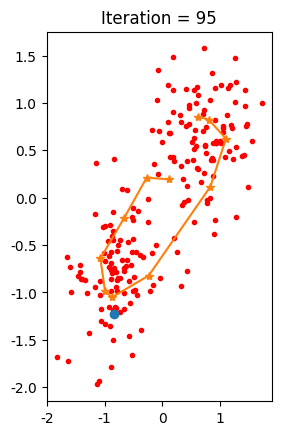

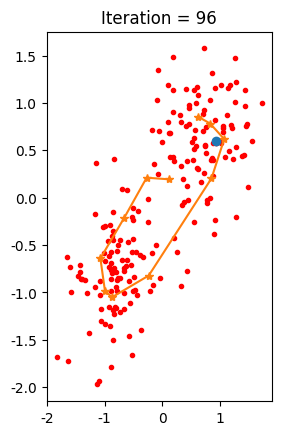

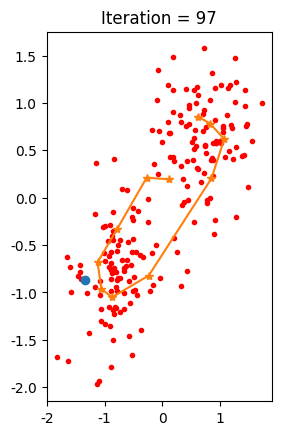

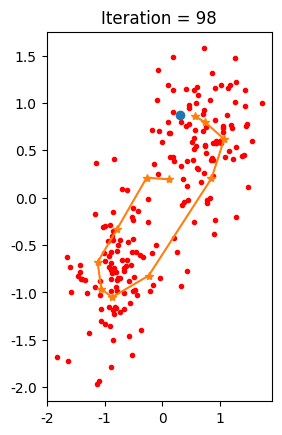

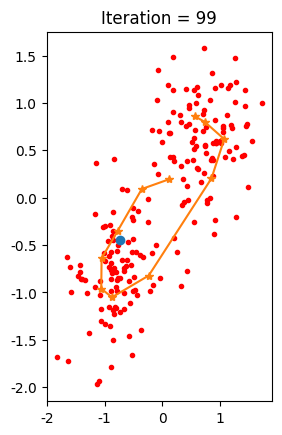

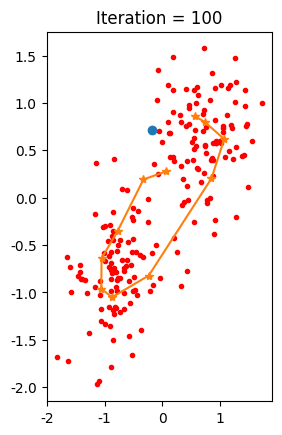

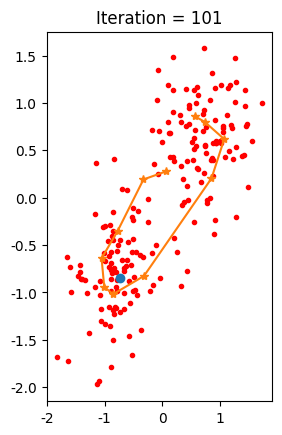

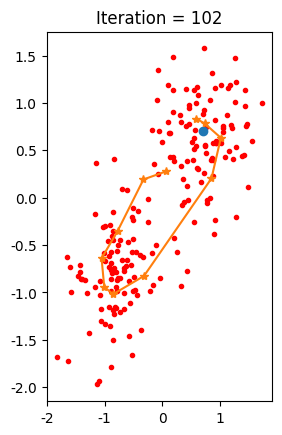

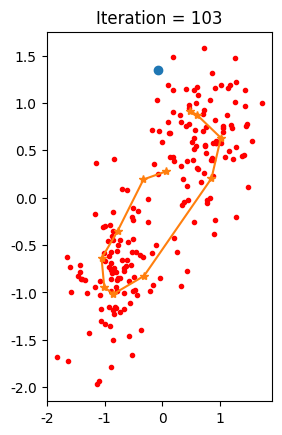

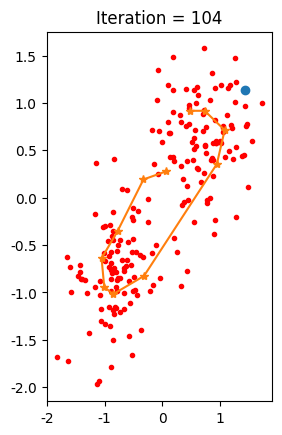

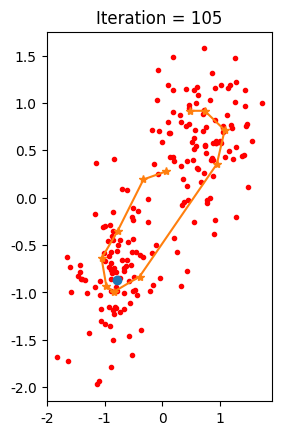

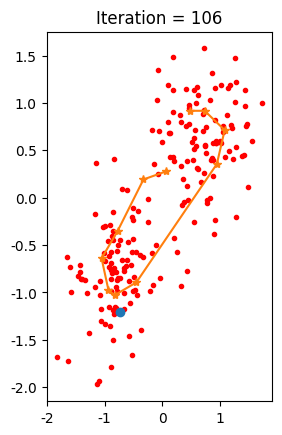

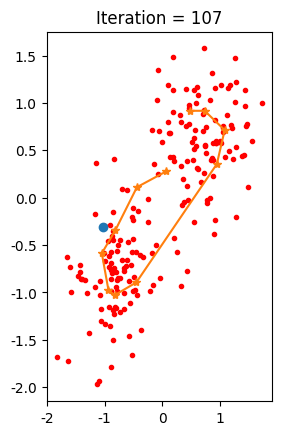

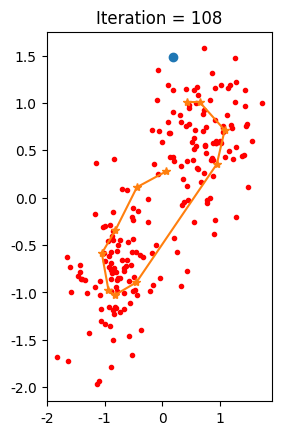

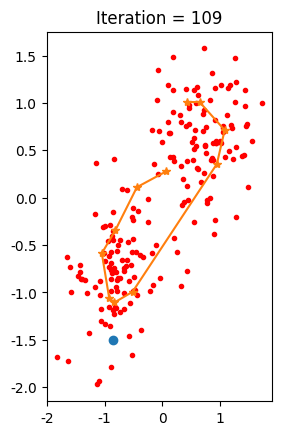

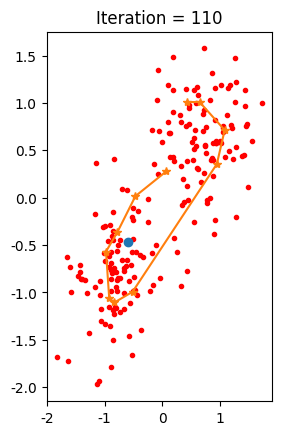

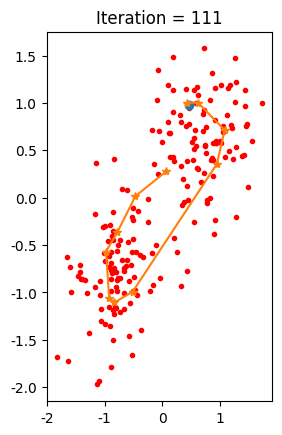

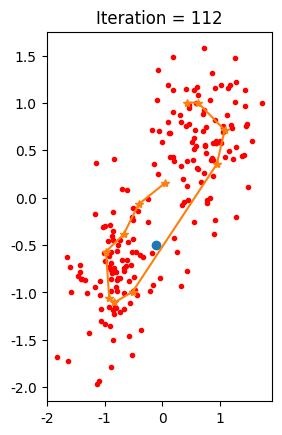

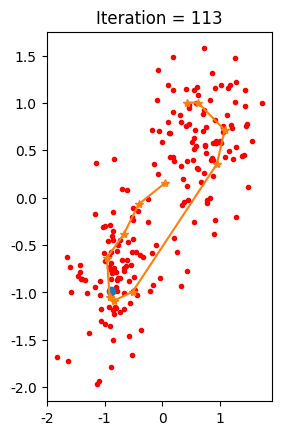

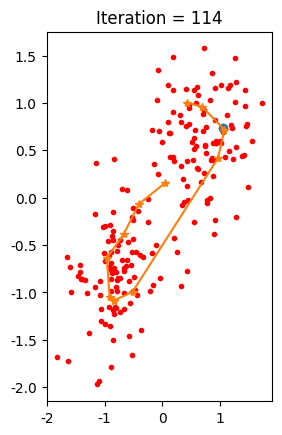

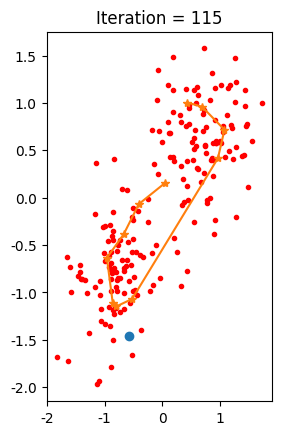

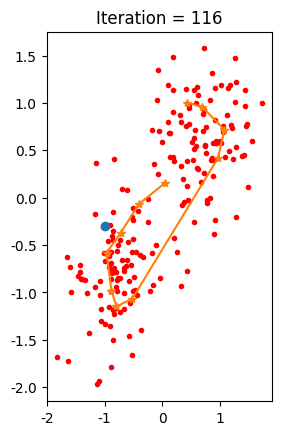

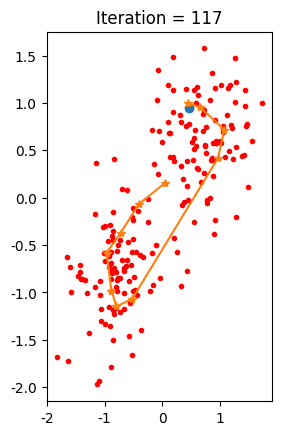

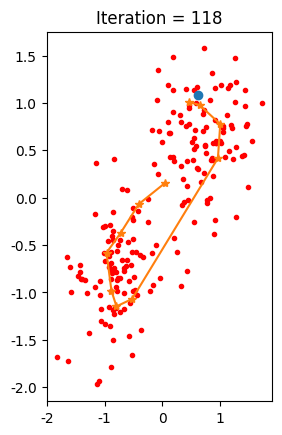

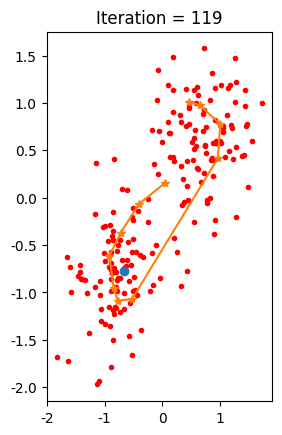

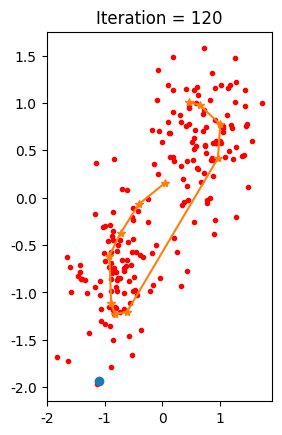

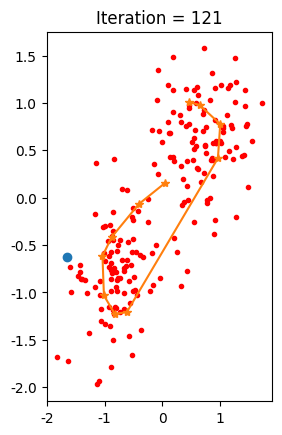

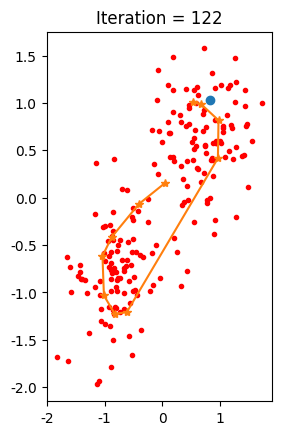

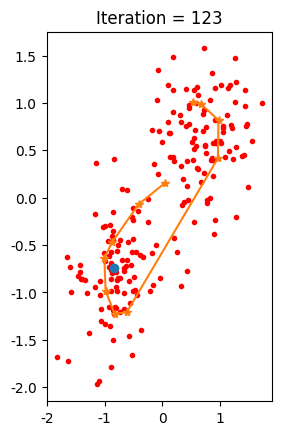

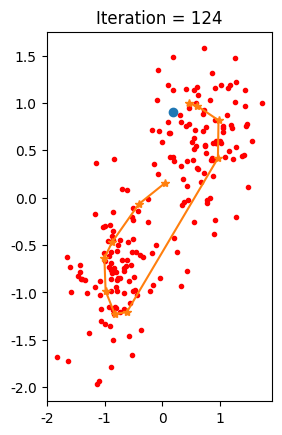

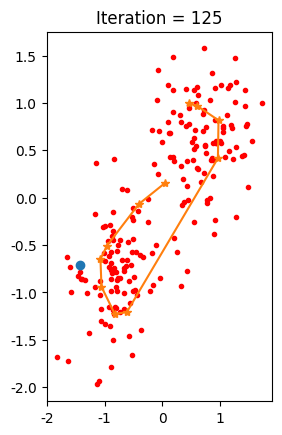

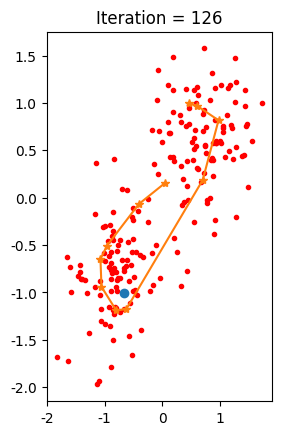

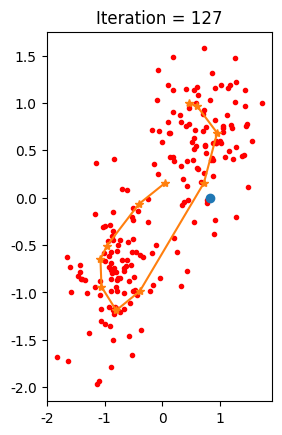

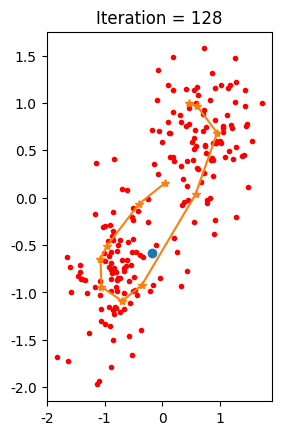

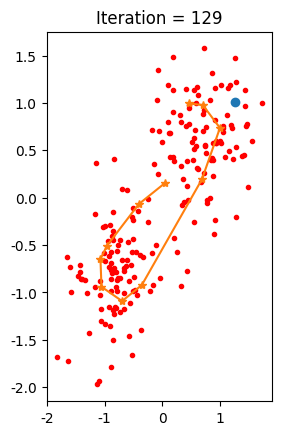

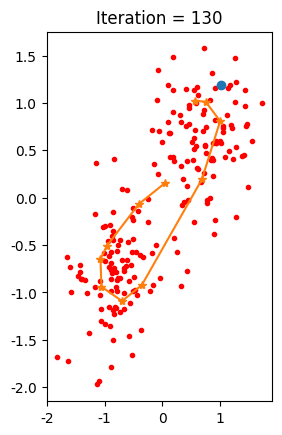

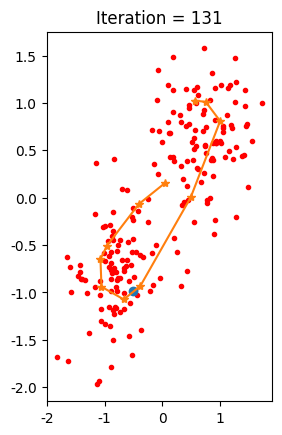

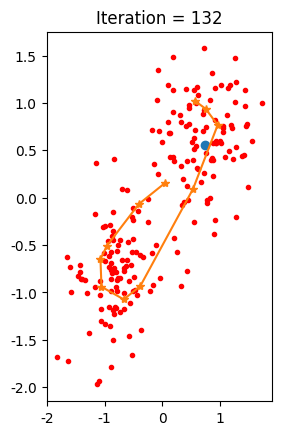

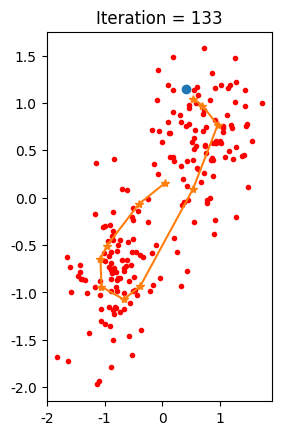

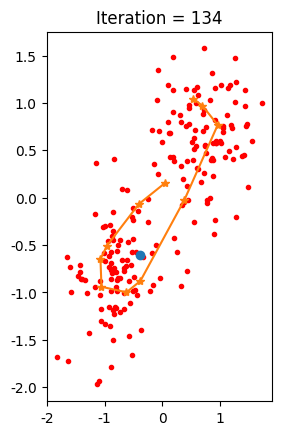

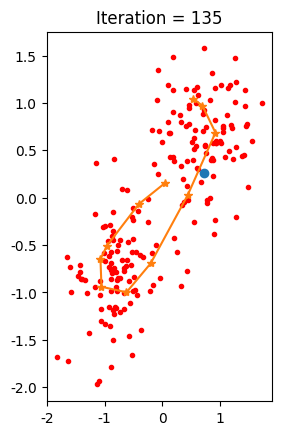

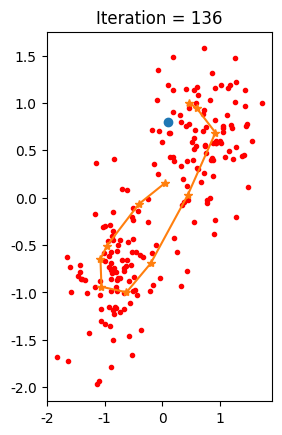

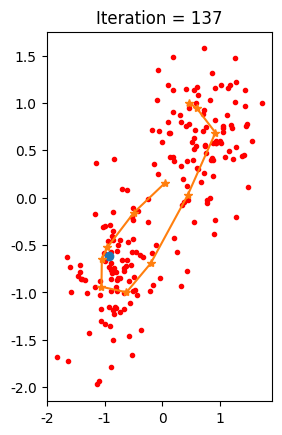

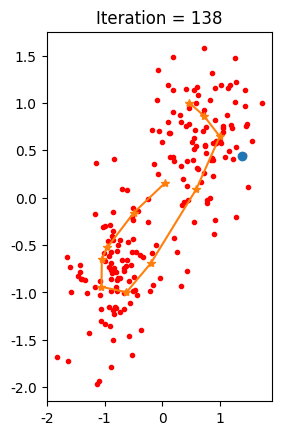

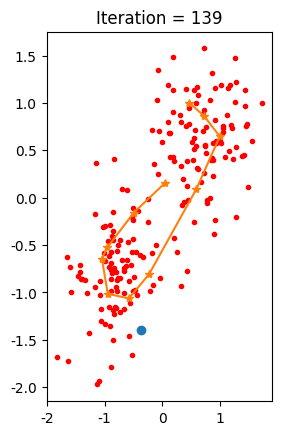

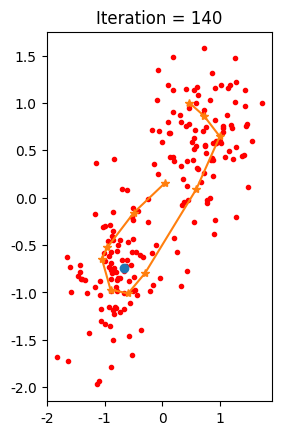

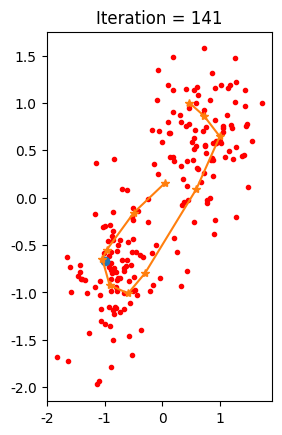

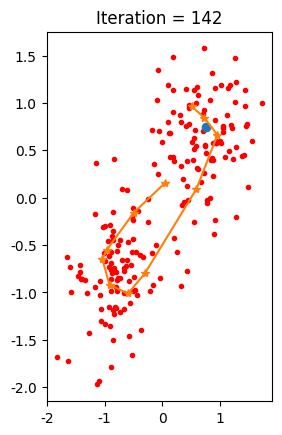

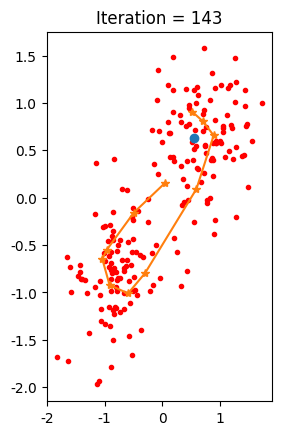

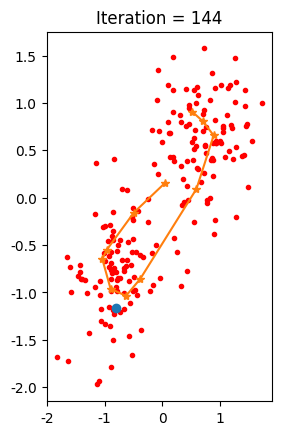

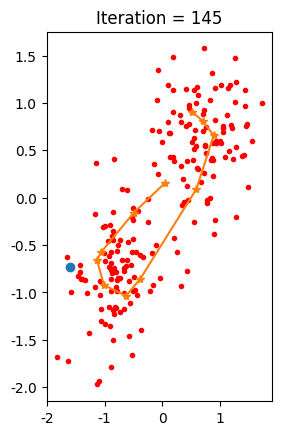

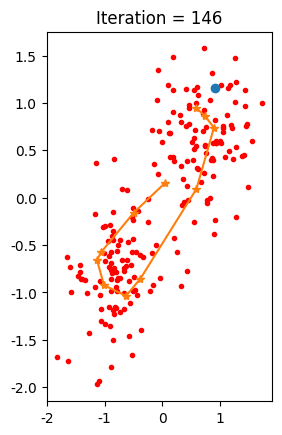

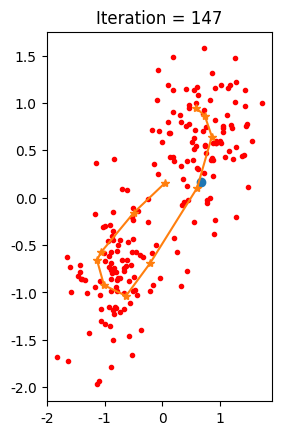

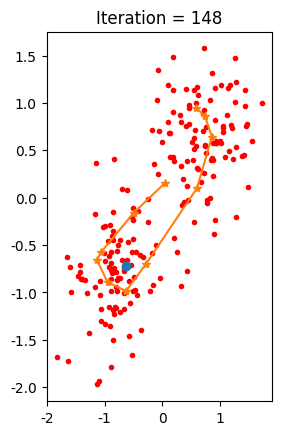

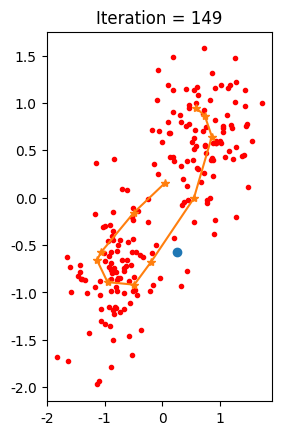

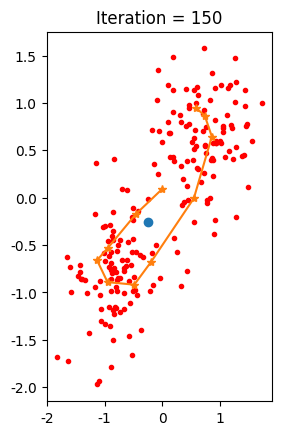

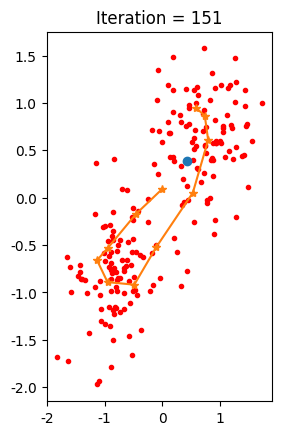

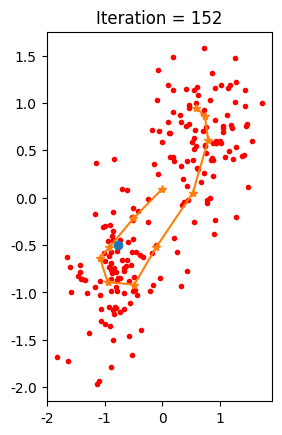

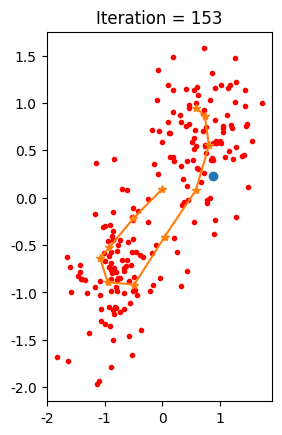

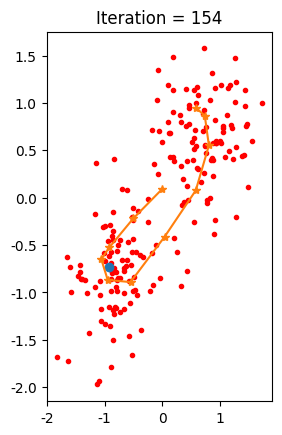

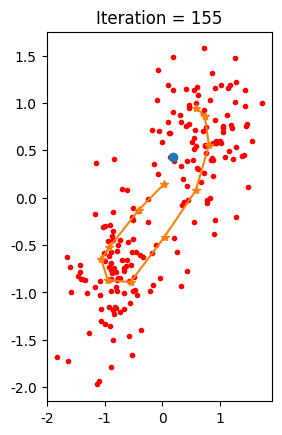

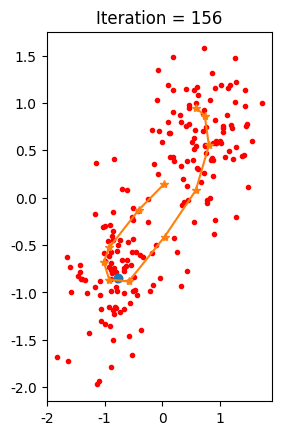

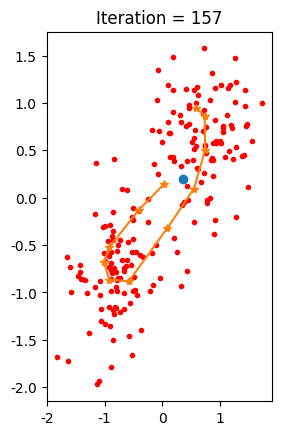

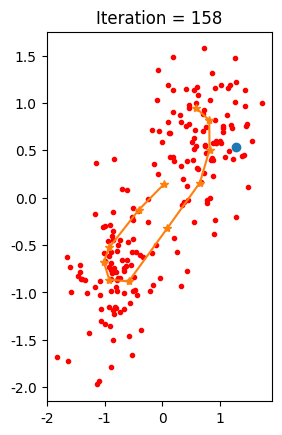

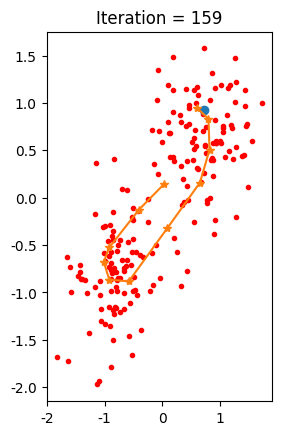

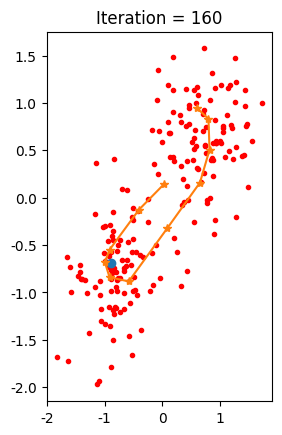

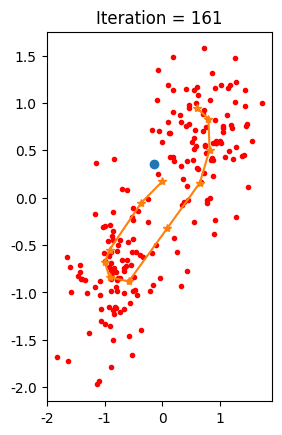

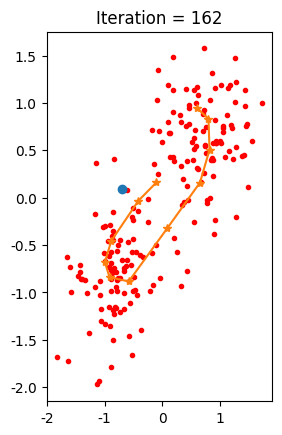

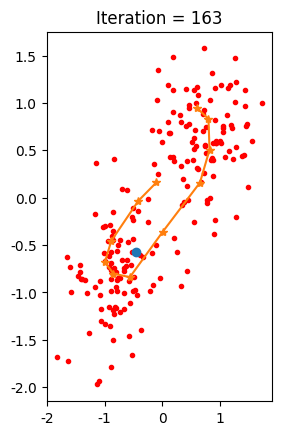

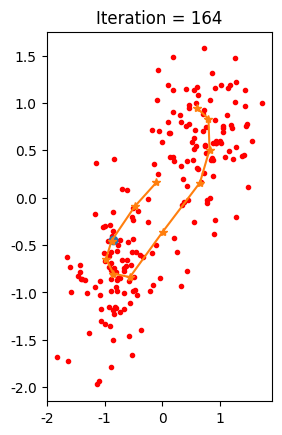

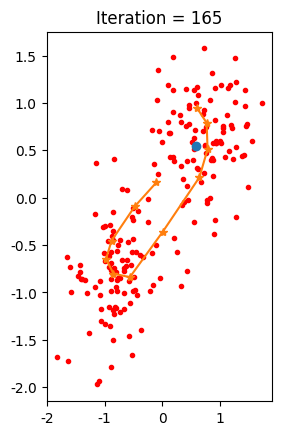

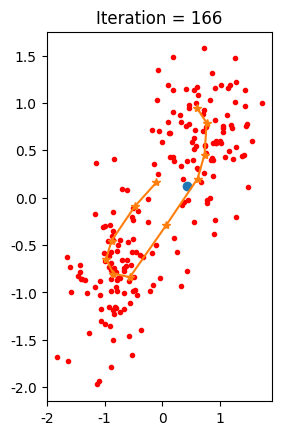

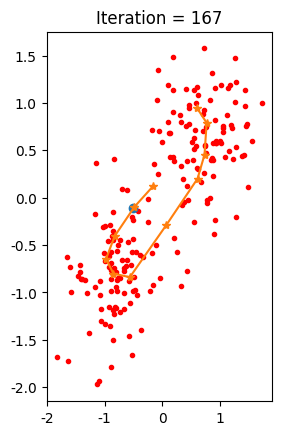

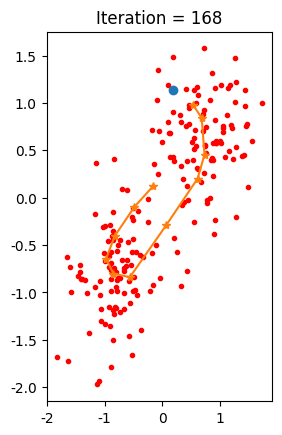

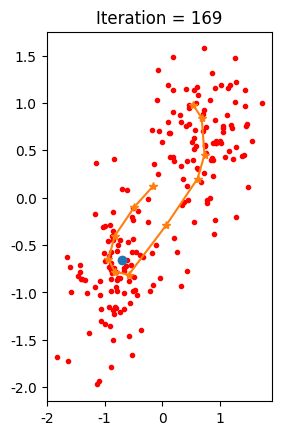

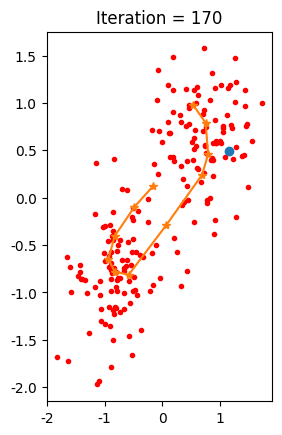

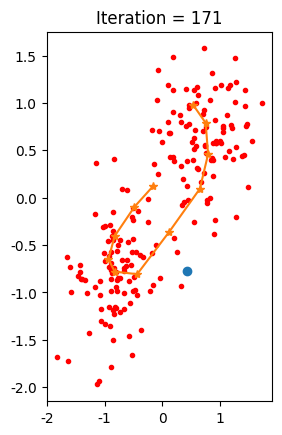

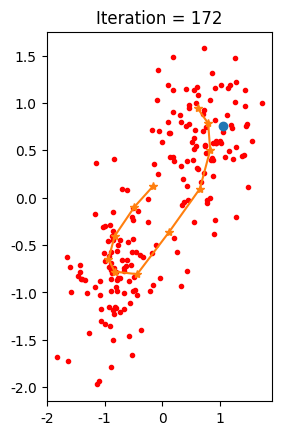

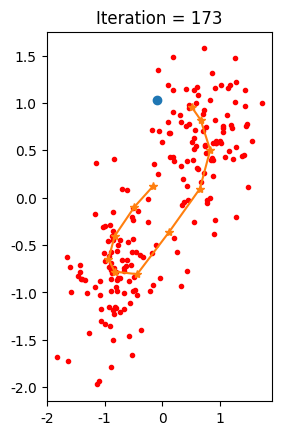

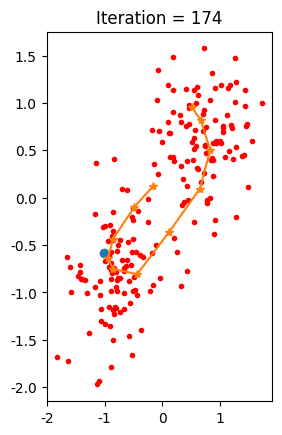

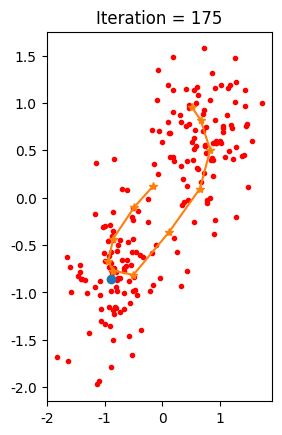

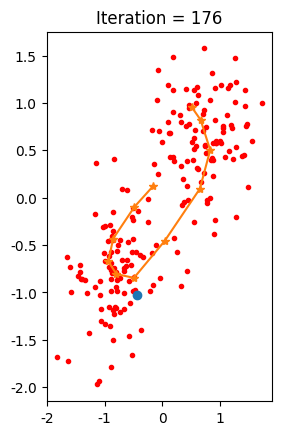

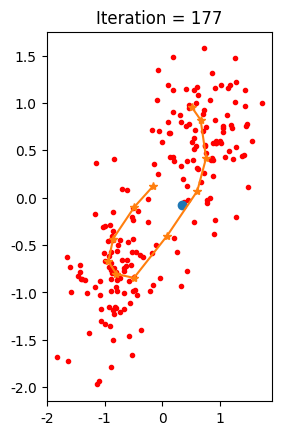

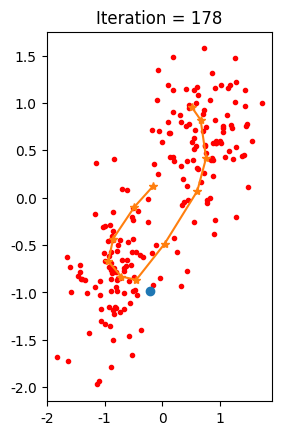

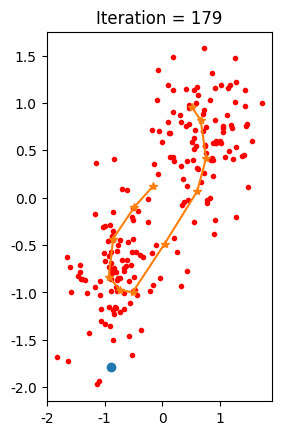

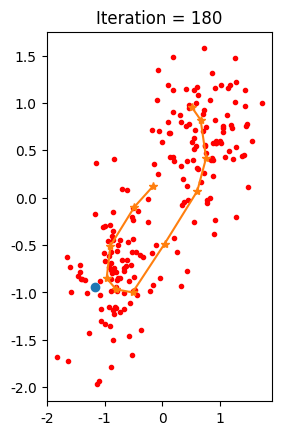

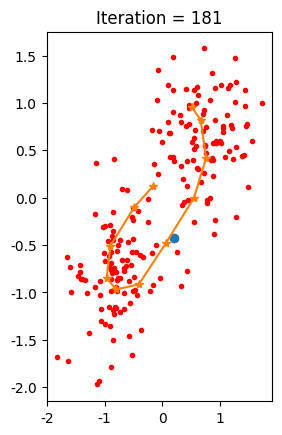

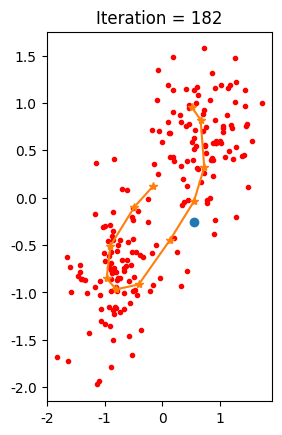

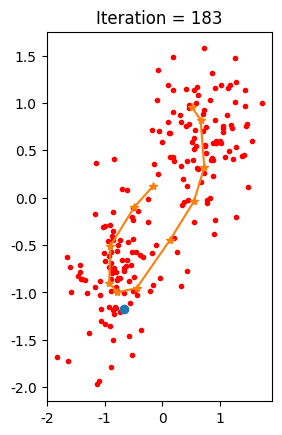

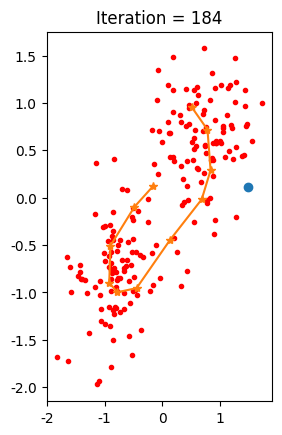

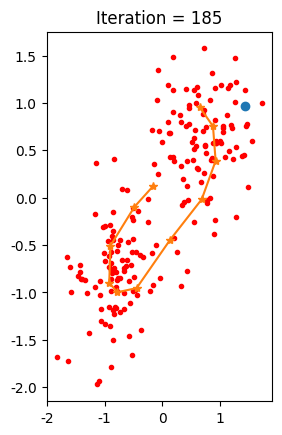

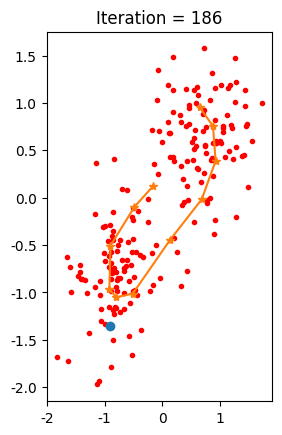

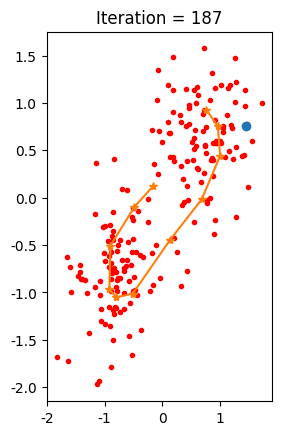

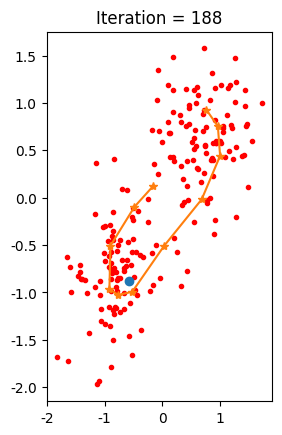

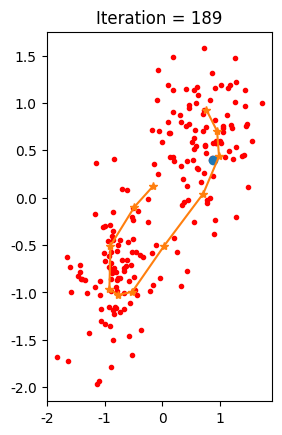

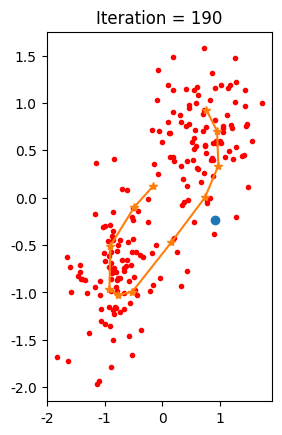

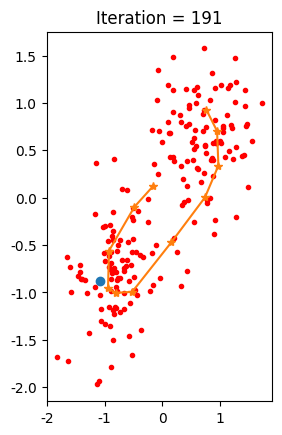

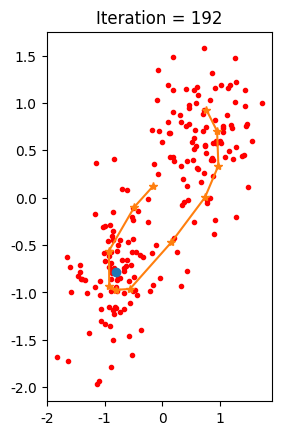

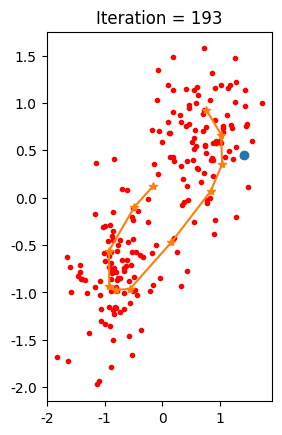

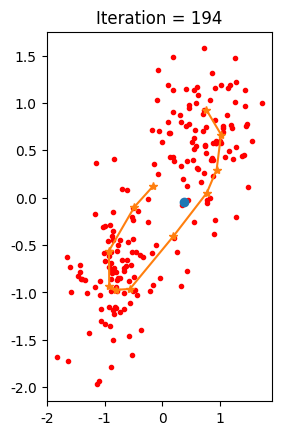

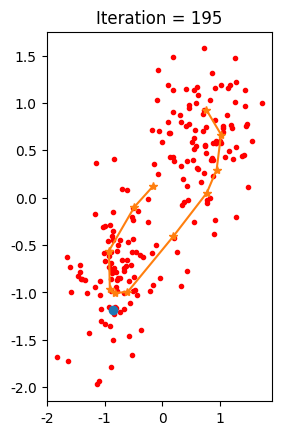

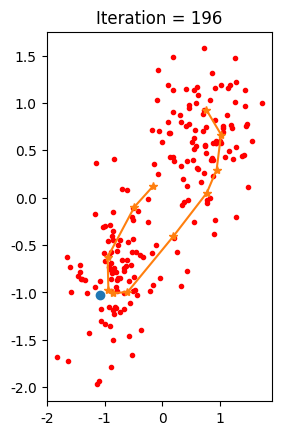

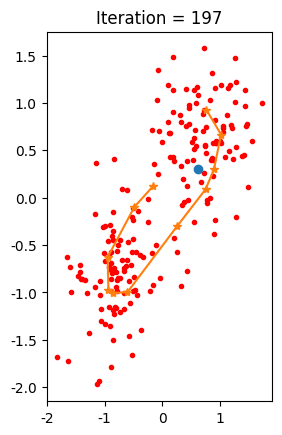

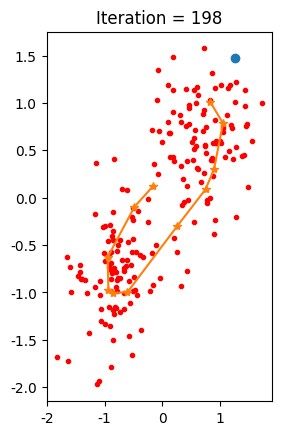

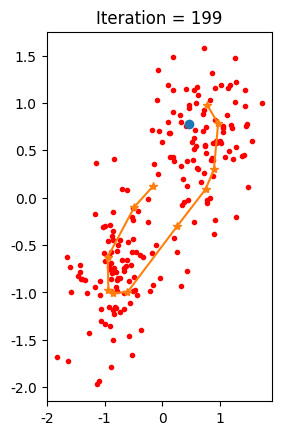

<module 'matplotlib.pyplot' from '/config/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [3]:
import os
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 마이너스 기호 표시 설정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정 - Windows
# font_location = fm.findfont(fm.FontProperties(family='Malgun Gothic'))
# fm.FontProperties(fname=font_location)
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 로거 수준을 ERROR로 설정하여 경고 메시지를 제거
matplotlib_logger = logging.getLogger("matplotlib")
matplotlib_logger.setLevel(logging.ERROR)
# 한글 폰트 설정 - Linux
font_dir = "/usr/share/fonts/truetype/nanum"
nanum_gothic_ttf = os.path.join(font_dir, "NanumGothic.ttf")
nanum_gothic = fm.FontProperties(fname=nanum_gothic_ttf)
# plt.rcParams["font.family"] = nanum_gothic.get_name()
plt.rcParams["axes.unicode_minus"] = False

def onces(rows, cols):
    return np.ones((rows, cols))

# Parameters
N = 100  # 각 클러스터의 표본의 개수
N2 = N + N
eta = 0.2
means = np.array([[0.7, -0.8],
                  [0.7, -0.8]])
var = np.array([0.2, 0.2])

x = datagen([N, N], np.vstack((means, var)))  # x: N2 by 2
x = randomize(x)  # 행의 값을 랜덤하게 섞기
ncenter = 11  # 사용할 클러스터 뉴런의 개수
w = np.random.rand(ncenter, 2) - 0.5 * onces(ncenter, 2)  # 초기 뉴런은 특징 공간상에 임의로 위치시킴

plt.figure()
plt.subplot(121)
plt.plot(x[:, 0], x[:, 1], 'r.', w[:, 0], w[:, 1], '*-')
plt.axis([-2, 2, -2, 2])
plt.title('초기화', fontproperties=nanum_gothic)

i = 1
iter = 1
converge = 0

while converge == 0:
    dn = np.ones((ncenter, 1)) * x[i, :] - w
    ddn = np.sum((dn * dn), axis=1)  # ddn: ncenter by 1
    istar = np.argmin(ddn)

    if istar == 0:
        w[[istar, istar + 1], :] = w[[istar, istar + 1], :] + eta * (np.ones((2, 1)) * x[i, :] - w[[istar, istar + 1], :])
    elif istar == ncenter - 1:
        w[[istar - 1, istar], :] = w[[istar - 1, istar], :] + eta * (np.ones((2, 1)) * x[i, :] - w[[istar - 1, istar], :])
    else:
        w[[istar - 1, istar, istar + 1], :] = w[[istar - 1, istar, istar + 1], :] + eta * (np.ones((3, 1)) * x[i, :] - w[[istar - 1, istar, istar + 1], :])

    plt.subplot(122)
    plt.plot(x[:, 0], x[:, 1], 'r.', x[i, 0], x[i, 1], 'o', w[:, 0], w[:, 1], '*-')
    plt.title(f'Iteration = {iter}')
    plt.pause(0.01)

    i = (i + 1) % N2
    iter += 1

    if i == 0:
        x = randomize(x)  # 클러스터의 순서를 랜덤하게 섞는다.
        i = 1  # 재배치된 입력으로 시작

    if iter % 50 == 0:
        eta *= 0.9
        if iter >= 200:
            converge = 1

plt


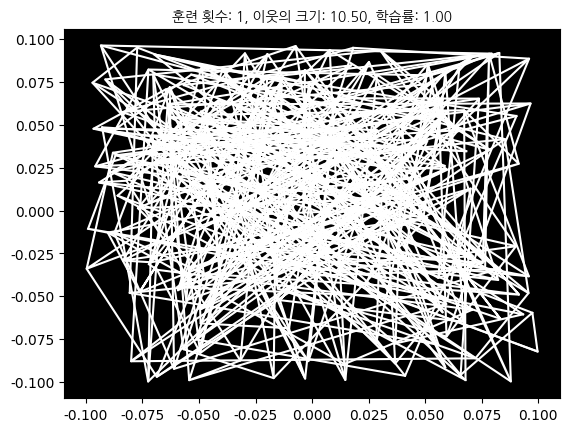

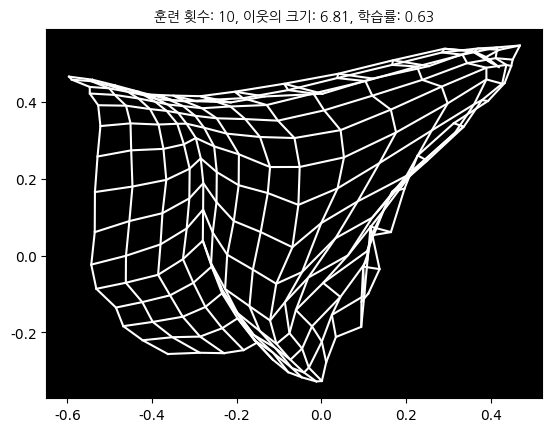

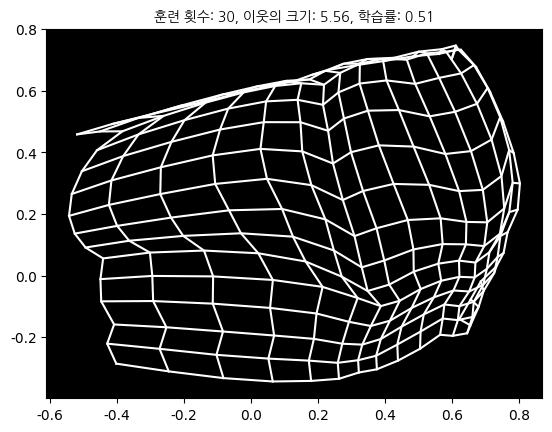

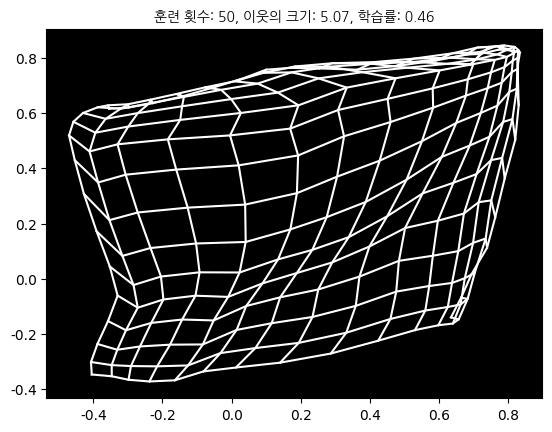

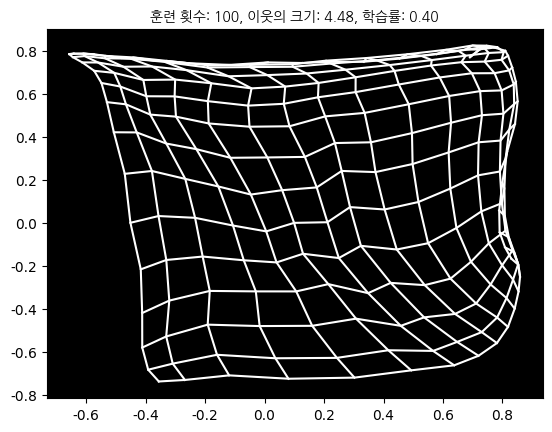

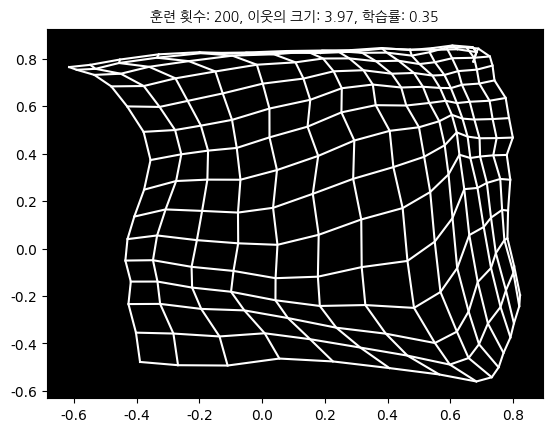

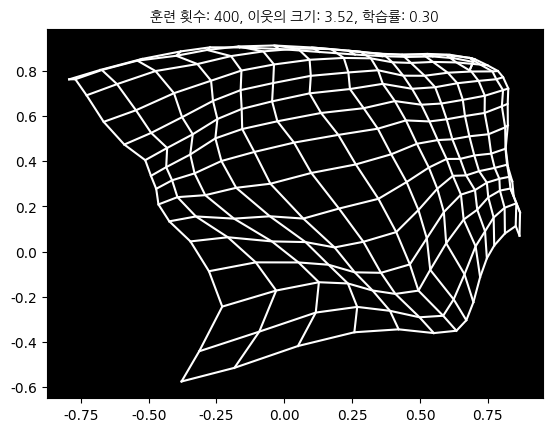

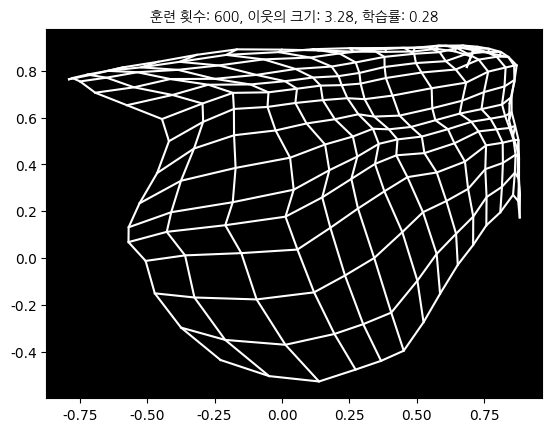

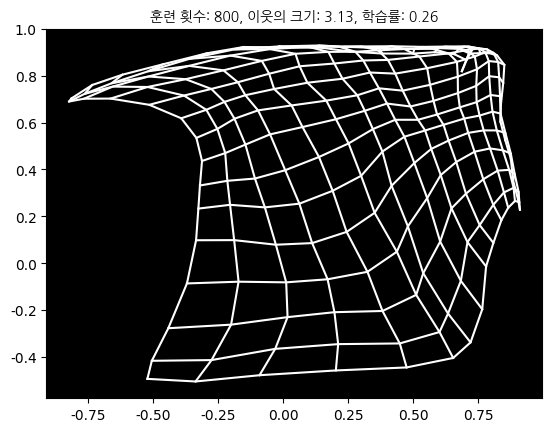

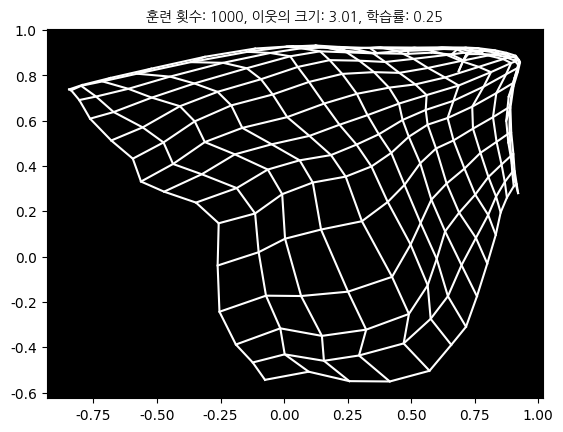

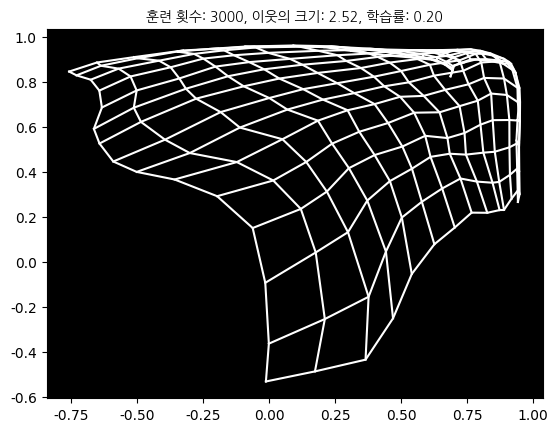

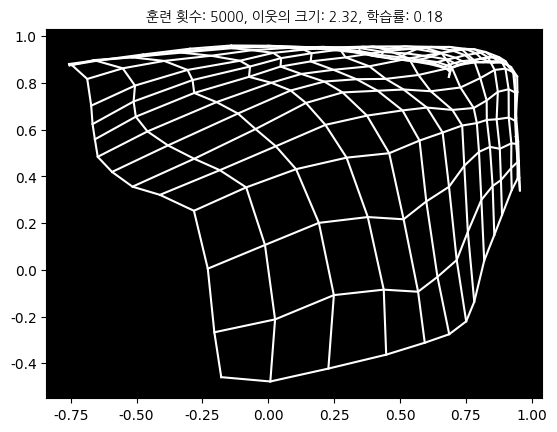

In [4]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 마이너스 기호 표시 설정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정 - Windows
# font_location = fm.findfont(fm.FontProperties(family='Malgun Gothic'))
# fm.FontProperties(fname=font_location)
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 로거 수준을 ERROR로 설정하여 경고 메시지를 제거
matplotlib_logger = logging.getLogger("matplotlib")
matplotlib_logger.setLevel(logging.ERROR)
# 한글 폰트 설정 - Linux
font_dir = "/usr/share/fonts/truetype/nanum"
nanum_gothic_ttf = os.path.join(font_dir, "NanumGothic.ttf")
nanum_gothic = fm.FontProperties(fname=nanum_gothic_ttf)
# plt.rcParams["font.family"] = nanum_gothic.get_name()
plt.rcParams["axes.unicode_minus"] = False

# 초기 연결 가중치 개수
num_rows = 15
num_cols = 15
a = 0.20  # 이웃 크기(G)와 학습률(eta)의 감소를 위한 인자

# 초기 가중치 값 설정
dx = 0.1
m = dx * (1 - 2 * np.random.rand(num_rows, num_cols)) + dx * (1j - 2j * np.random.rand(num_rows, num_cols))

for cycle in range(1, 5001):
    eta = cycle ** (-a)
    G = 0.5 + 10 * cycle ** (-a)  # 가우시안 폭 관련 파라미터
    x = 1 - 2 * np.random.rand()
    y = 1 - 2 * np.random.rand()

    inp = x + y * 1j  # 입력 데이터(복소수로 2차원 표현)

    dist_mat = (np.real(m) - np.real(inp)) ** 2 + (np.imag(m) - np.imag(inp)) ** 2
    win_rows, win_cols = np.unravel_index(np.argmin(dist_mat, axis=None), dist_mat.shape)

    col_idx, row_idx = np.meshgrid(range(1, num_cols + 1), range(1, num_rows + 1))
    grid_dist = np.abs(row_idx - win_rows) + np.abs(col_idx - win_cols)
    f = eta * np.exp(-(grid_dist / G) ** 2)

    if cycle in [1, 10, 30, 50, 100, 200, 400, 600, 800, 1000, 3000, 5000]:
        plt.clf()
        plt.plot(np.real(m), np.imag(m), 'w-', np.real(m.T), np.imag(m.T), 'w-')
        plt.gca().set_facecolor('k')
        plt.title('훈련 횟수: {}, 이웃의 크기: {:.2f}, 학습률: {:.2f}'.format(cycle, G, eta), fontproperties=nanum_gothic)
        plt.draw()
        plt.pause(0.001)

    m = m + f * (inp - m)

plt.show()
